In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv("Hospital_Dataset.csv")
d = pd.DataFrame(data)
df = d.copy()
pd.set_option("display.max_column",None)

In [72]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category
0,19.0,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low
1,18.0,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium
2,30.0,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium
3,67.0,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High
4,46.0,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 25424 non-null  float64
 1   Gender              25424 non-null  object 
 2   Blood Type          25424 non-null  object 
 3   Medical Condition   25424 non-null  object 
 4   Date of Admission   25424 non-null  object 
 5   Doctor              25424 non-null  object 
 6   Hospital            25424 non-null  object 
 7   Insurance Provider  25424 non-null  object 
 8   Billing Amount      25424 non-null  float64
 9   Room Number         25424 non-null  int64  
 10  Admission Type      25424 non-null  object 
 11  Discharge Date      25424 non-null  object 
 12  Medication          25424 non-null  object 
 13  Test Results        25424 non-null  object 
 14  Length_of_Stay      25424 non-null  int64  
 15  Age_Group           25424 non-null  object 
 16  Bill

In [74]:
date_col = ["Date of Admission","Discharge Date"]
for col  in date_col:
    df[col] = pd.to_datetime(df[col])

In [75]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Length_of_Stay', 'Age_Group', 'Billing_Category'],
      dtype='object')

In [76]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Length_of_Stay', 'Age_Group', 'Billing_Category'],
      dtype='object')

In [77]:
cat_col = ['Gender', 'Blood Type', 'Medical Condition',
       'Hospital' ,
       'Admission Type',  'Medication',
       'Test Results','Age_Group', 'Billing_Category']
for col in cat_col:
    df[col] = df[col].astype('category')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 25424 non-null  float64       
 1   Gender              25424 non-null  category      
 2   Blood Type          25424 non-null  category      
 3   Medical Condition   25424 non-null  category      
 4   Date of Admission   25424 non-null  datetime64[ns]
 5   Doctor              25424 non-null  object        
 6   Hospital            25424 non-null  category      
 7   Insurance Provider  25424 non-null  object        
 8   Billing Amount      25424 non-null  float64       
 9   Room Number         25424 non-null  int64         
 10  Admission Type      25424 non-null  category      
 11  Discharge Date      25424 non-null  datetime64[ns]
 12  Medication          25424 non-null  category      
 13  Test Results        25424 non-null  category  

# EDA

In [79]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Length_of_Stay
count,25424.000000,25424,25424.000000,25424.000000,25424,25424.000000
mean,51.413271,2021-10-29 04:09:12.800503552,25514.599017,301.818872,2021-11-14 08:46:31.189427456,16.192574
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-10 00:00:00,1.000000
25%,34.000000,2020-07-21 00:00:00,13217.715517,203.000000,2020-08-07 00:00:00,8.000000
50%,51.000000,2021-10-27 00:00:00,25543.499141,303.000000,2021-11-13 00:00:00,15.000000
75%,68.000000,2023-01-31 00:00:00,37690.291497,401.000000,2023-02-16 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,1636.000000
std,19.678631,NaN,14182.038455,115.312619,NaN,27.849516


In [80]:
df.head(2)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category
0,19.0,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low
1,18.0,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium


C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\188670104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Gender").agg({"Billing Amount": "sum"}) \


<Axes: title={'center': 'Total Billing Amount by Gender'}, xlabel='Gender', ylabel='Total Billing Amount'>

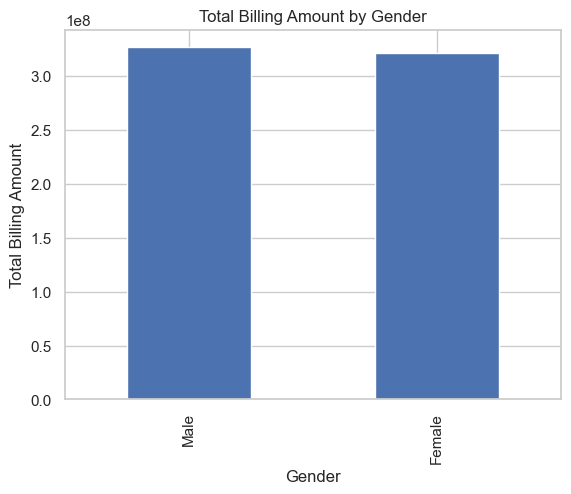

In [81]:
df.groupby("Gender").agg({"Billing Amount": "sum"}) \
  .sort_values(by="Billing Amount", ascending=False) \
  .plot(kind='bar', xlabel="Gender", ylabel="Total Billing Amount", 
        title="Total Billing Amount by Gender", legend=False)


In [82]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category
0,19.0,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low
1,18.0,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium
2,30.0,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium
3,67.0,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High
4,46.0,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium


In [83]:
df["Age"] = df["Age"].astype('int')

In [84]:
# Checkiing data sprea by age group

a = [10,20,30,40,50,60,70,80,90]
b = ["10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90"]
df["Age Group"] = pd.cut(df["Age"],bins = a ,labels = b)

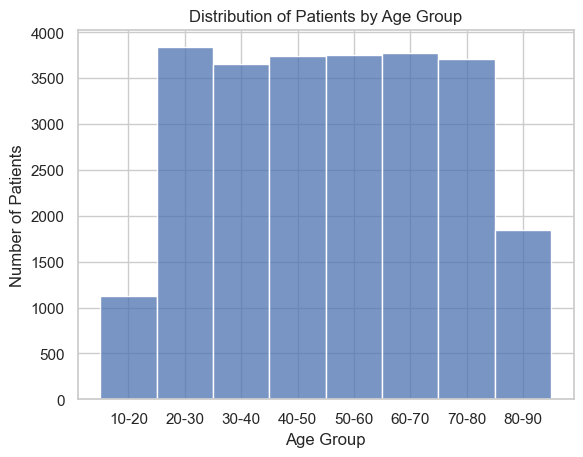

In [85]:
sns.histplot(data=df, x="Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients by Age Group")
plt.show()

C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\3849781110.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age Group").agg({"Billing Amount" : "sum"}).sort_values(by = "Billing Amount",ascending = False).plot(kind = 'bar')


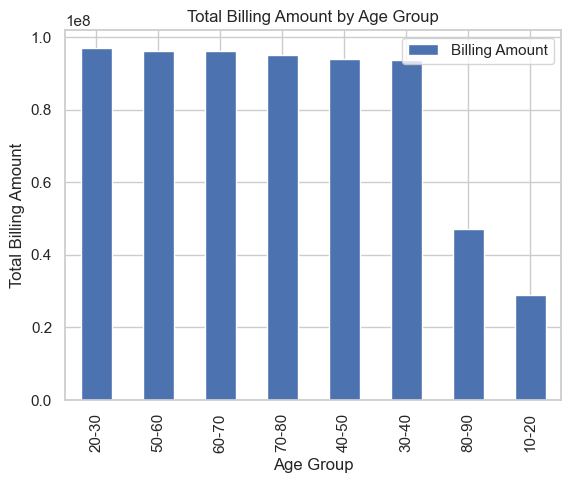

In [86]:
# Which Age Group have highest Billing Amount and lowest?

df.groupby("Age Group").agg({"Billing Amount" : "sum"}).sort_values(by = "Billing Amount",ascending = False).plot(kind = 'bar')
plt.xlabel("Age Group")
plt.ylabel("Total Billing Amount")
plt.title("Total Billing Amount by Age Group")
plt.show()

## The highest Age group by Billing Amount is "20-30" having 10cr Billing Amount
## and lowest billing amount of age group are "80-90" = 4.5cr and "10-20" = 2.5cr

<Axes: xlabel='Discharge Date', ylabel='Billing Amount'>

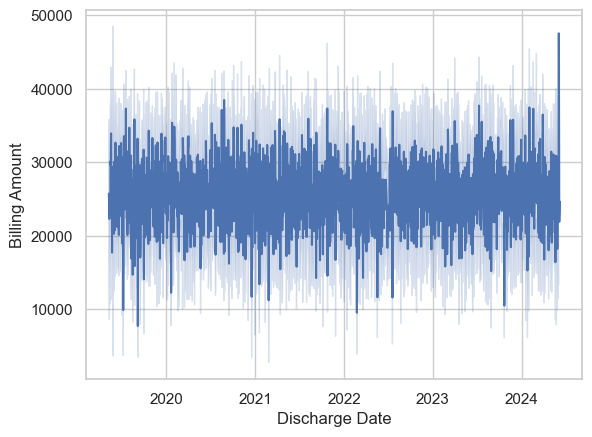

In [87]:
# Perform Year analysis by Billing AMount

sns.lineplot(data = df,x = "Discharge Date",y = "Billing Amount")

In [88]:
df["Months"] = df["Discharge Date"].dt.month
df["Year"] = df["Discharge Date"].dt.year

In [89]:
df["Month Year"] = df["Months"].astype(str)+ "-" + df["Year"].astype(str)

In [90]:
df["Month Year"] = pd.to_datetime(df["Month Year"])

C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\2807000513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Month Year"] = pd.to_datetime(df["Month Year"])


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 25424 non-null  int64         
 1   Gender              25424 non-null  category      
 2   Blood Type          25424 non-null  category      
 3   Medical Condition   25424 non-null  category      
 4   Date of Admission   25424 non-null  datetime64[ns]
 5   Doctor              25424 non-null  object        
 6   Hospital            25424 non-null  category      
 7   Insurance Provider  25424 non-null  object        
 8   Billing Amount      25424 non-null  float64       
 9   Room Number         25424 non-null  int64         
 10  Admission Type      25424 non-null  category      
 11  Discharge Date      25424 non-null  datetime64[ns]
 12  Medication          25424 non-null  category      
 13  Test Results        25424 non-null  category  

Text(0, 0.5, 'Billing Amount')

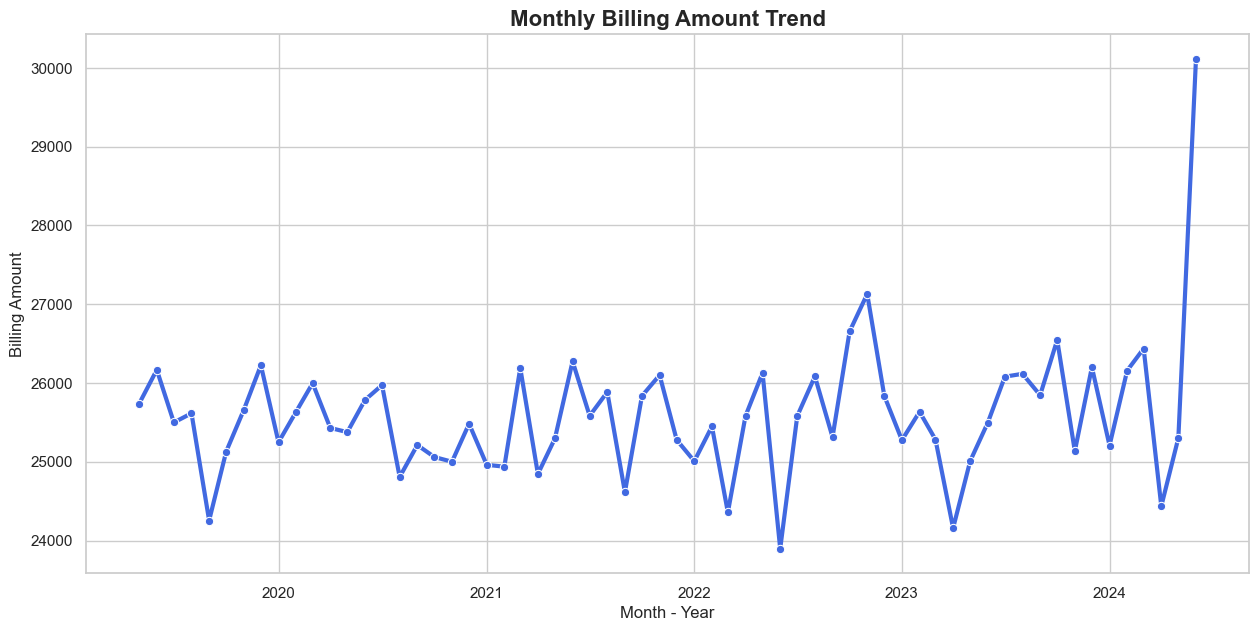

In [92]:

plt.figure(figsize = (15,7))
sns.set_theme(style="whitegrid")
sns.lineplot(data = df, x = "Month Year",y = "Billing Amount",linewidth = 3
             ,marker = "o",errorbar = None,color = "royalblue")
plt.title("Monthly Billing Amount Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month - Year", fontsize=12)
plt.ylabel("Billing Amount", fontsize=12)

## There is a very high jump in May 2024

In [93]:
df["Months"] = df["Months"].astype('category')
df["Year"] = df["Year"].astype('category')

In [94]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


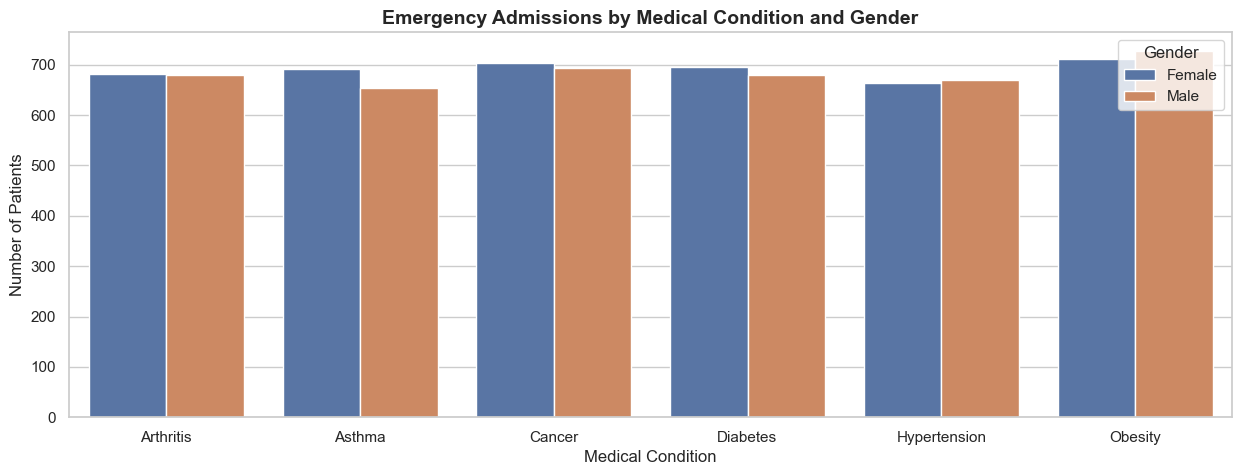

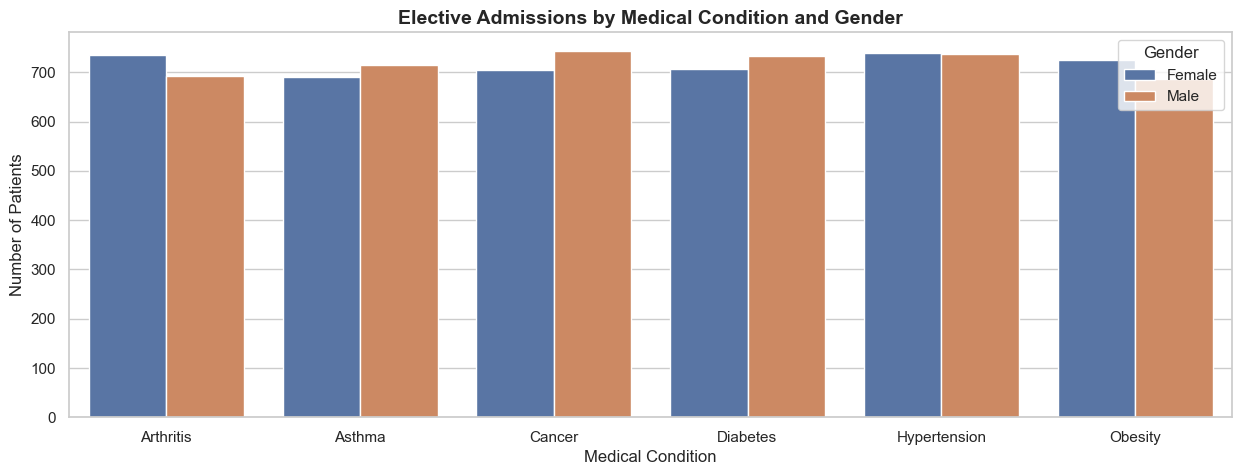

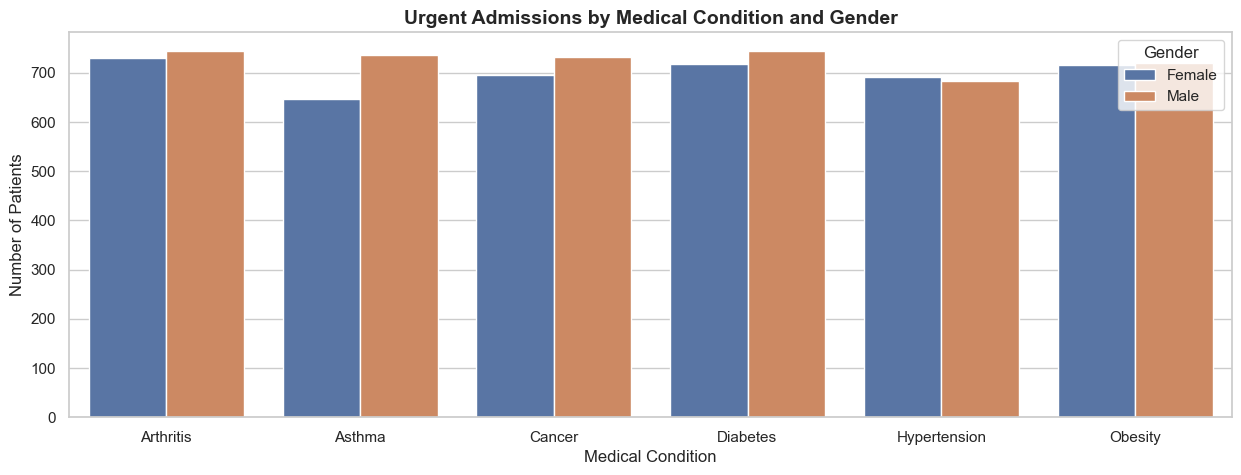

In [95]:
# Plot Patient count by Medical condition and admission type with gender distribution

df_adm = ['Emergency', 'Elective', 'Urgent']

for col in df_adm:
   plt.figure(figsize = (15,5))
   df_adm_type =  df[df["Admission Type"] == col]
   sns.countplot(data = df_adm_type, x = "Medical Condition",hue = "Gender")
   plt.xlabel("Medical Condition", fontsize=12)
   plt.ylabel("Number of Patients", fontsize=12)
   plt.title(f"{col} Admissions by Medical Condition and Gender", fontsize=14, fontweight='bold')



In [96]:
df["Admission Type"].unique()

['Elective', 'Emergency', 'Urgent']
Categories (3, object): ['Elective', 'Emergency', 'Urgent']

In [97]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\576653959.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cancer.groupby("Blood Type").agg({"Blood Type" : "count"}).plot(kind = 'bar')


Text(0.5, 1.0, 'Number of Cancer Patients by Blood Type')

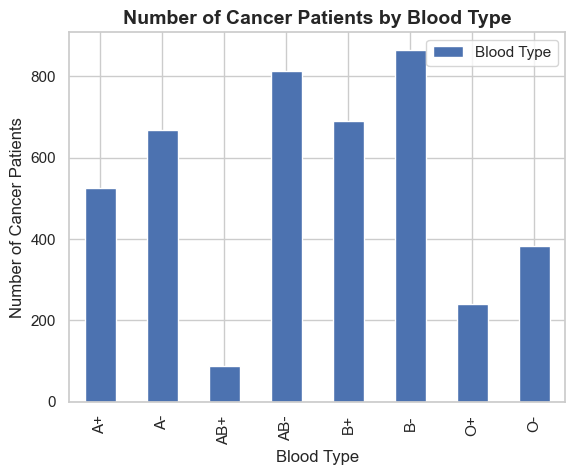

In [98]:
# Is there any relationship btw cancer patient and Blood Type

df_cancer = df[df["Medical Condition"] == 'Cancer']
df_cancer.groupby("Blood Type").agg({"Blood Type" : "count"}).plot(kind = 'bar')
plt.xlabel("Blood Type", fontsize=12)
plt.ylabel("Number of Cancer Patients", fontsize=12)
plt.title("Number of Cancer Patients by Blood Type", fontsize=14, fontweight='bold')

## The most common blood groups among cancer patients are(AB-, B+, B-)

In [99]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\1977205936.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Medical Condition").agg({"Billing Amount": "mean"}) \


<Axes: title={'center': 'Average Billing Amount by Medical Condition'}, xlabel='Medical Condition', ylabel='Average Billing Amount'>

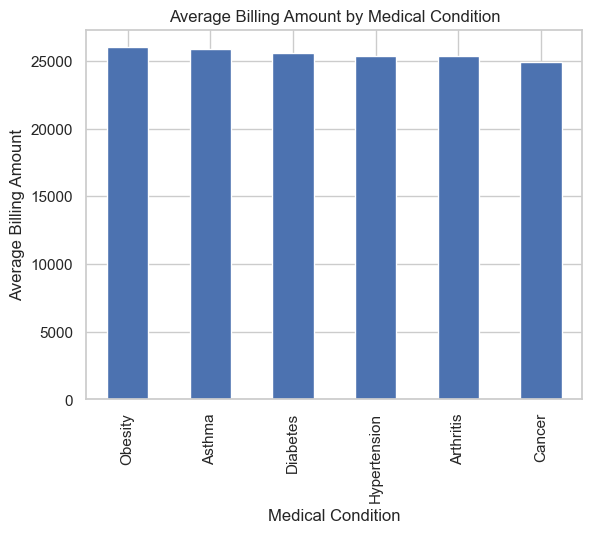

In [100]:
# FInd Avg billing amount by Medical conditions
df.groupby("Medical Condition").agg({"Billing Amount": "mean"}) \
  .sort_values(by="Billing Amount", ascending=False) \
  .plot(kind='bar', xlabel="Medical Condition", ylabel="Average Billing Amount",
        title="Average Billing Amount by Medical Condition", legend=False)

Text(0.5, 1.0, 'Billing Amount vs Length of Stay')

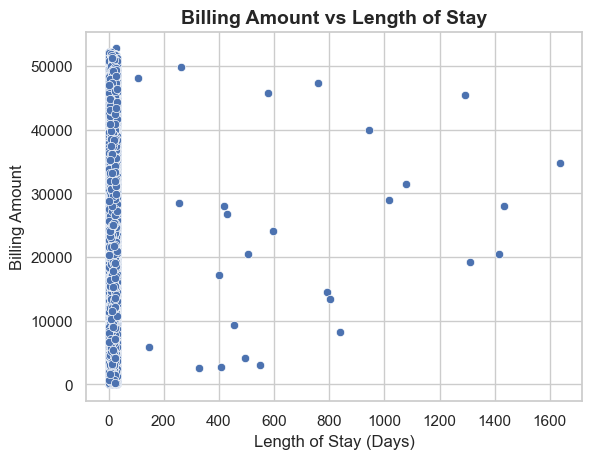

In [101]:
# IS there any relationship btw Length of stay and billing amount

sns.scatterplot(data = df,x = "Length_of_Stay",y = "Billing Amount")
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.ylabel("Billing Amount", fontsize=12)
plt.title("Billing Amount vs Length of Stay", fontsize=14, fontweight='bold')

## The data tells us that there are some cases who didn't stay for long but have highest Total bills

Text(0.5, 1.0, 'Patient Count by Age Group and Medical Condition')

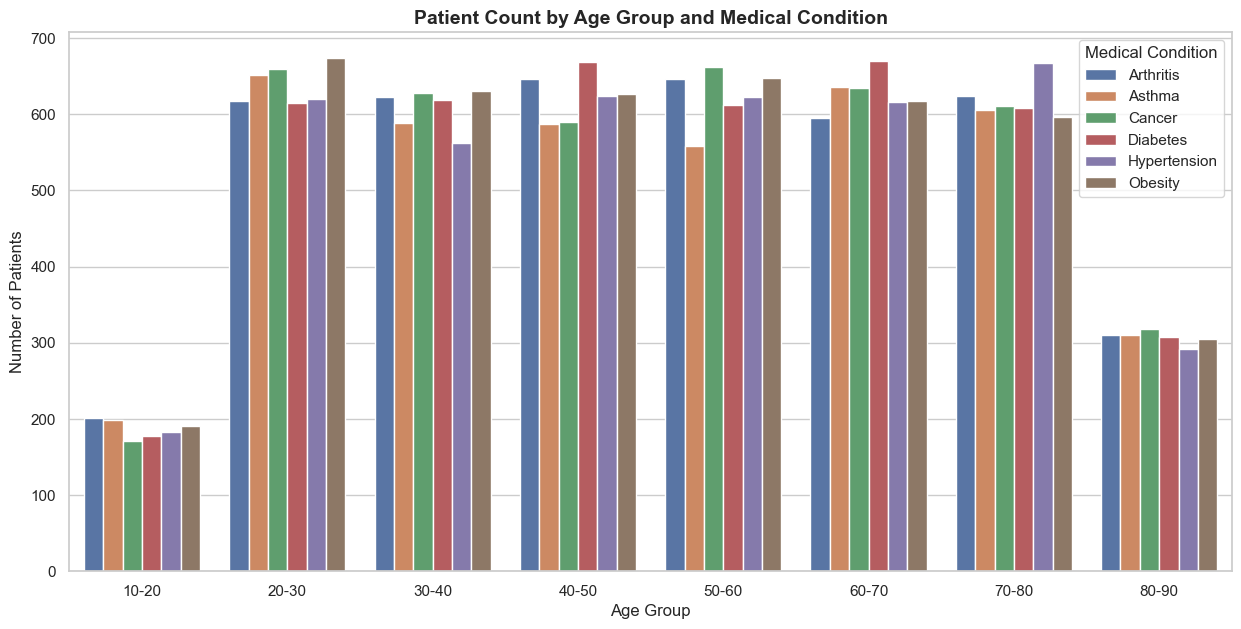

In [102]:
# IS there any specific Medical condition with Specific age?
plt.figure(figsize = (15,7))
sns.countplot(data = df,x = "Age Group",hue = "Medical Condition")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Patient Count by Age Group and Medical Condition", fontsize=14, fontweight='bold')

## The conditions are random, but the likelihood of diabetes increases after the age of 30.

Text(0.5, 1.0, 'Billing Amount Distribution by Blood Type')

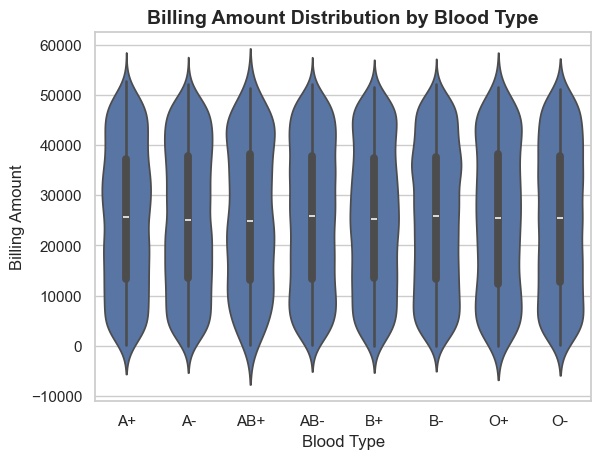

In [103]:
# IS there any relationship btw Billing Amount and Blood type??
sns.violinplot(data = df,x = "Blood Type", y = "Billing Amount")
plt.xlabel("Blood Type", fontsize=12)
plt.ylabel("Billing Amount", fontsize=12)
plt.title("Billing Amount Distribution by Blood Type", fontsize=14, fontweight='bold')

## There is No strong correlation btw Billing amount and Blood type

<Axes: >

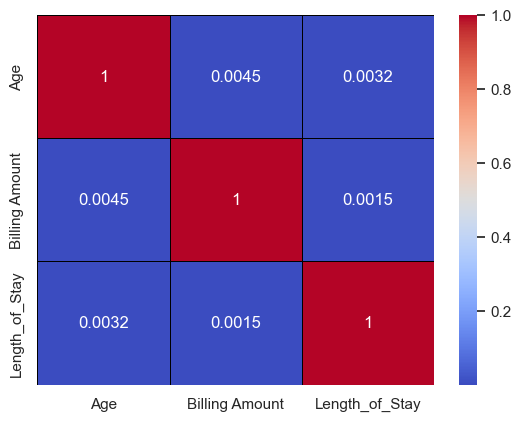

In [104]:
df_int = df[["Age","Billing Amount","Length_of_Stay"]]
corr = df_int.corr()
sns.heatmap(data = corr,annot = True,cmap = "coolwarm",linewidths = 0.6,linecolor = 'black')

## There is no Strong relationship btw Age,Billing amount, length of stay

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 25424 non-null  int64         
 1   Gender              25424 non-null  category      
 2   Blood Type          25424 non-null  category      
 3   Medical Condition   25424 non-null  category      
 4   Date of Admission   25424 non-null  datetime64[ns]
 5   Doctor              25424 non-null  object        
 6   Hospital            25424 non-null  category      
 7   Insurance Provider  25424 non-null  object        
 8   Billing Amount      25424 non-null  float64       
 9   Room Number         25424 non-null  int64         
 10  Admission Type      25424 non-null  category      
 11  Discharge Date      25424 non-null  datetime64[ns]
 12  Medication          25424 non-null  category      
 13  Test Results        25424 non-null  category  

In [106]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Length_of_Stay,Month Year
count,25424.000000,25424,25424.000000,25424.000000,25424,25424.000000,25424
mean,51.413271,2021-10-29 04:09:12.800503552,25514.599017,301.818872,2021-11-14 08:46:31.189427456,16.192574,2021-10-30 13:06:56.865953536
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-10 00:00:00,1.000000,2019-05-01 00:00:00
25%,34.000000,2020-07-21 00:00:00,13217.715517,203.000000,2020-08-07 00:00:00,8.000000,2020-08-01 00:00:00
50%,51.000000,2021-10-27 00:00:00,25543.499141,303.000000,2021-11-13 00:00:00,15.000000,2021-11-01 00:00:00
75%,68.000000,2023-01-31 00:00:00,37690.291497,401.000000,2023-02-16 00:00:00,23.000000,2023-02-01 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,1636.000000,2024-06-01 00:00:00
std,19.678631,NaN,14182.038455,115.312619,NaN,27.849516,NaN


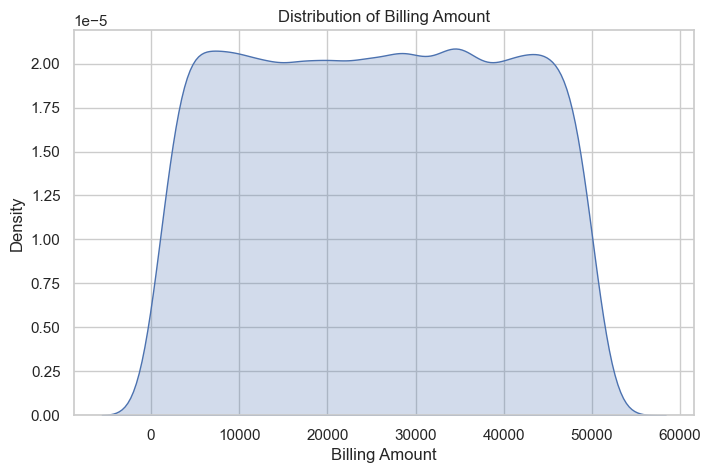

In [107]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="Billing Amount", fill=True)
plt.title("Distribution of Billing Amount")
plt.xlabel("Billing Amount")
plt.ylabel("Density")
plt.show()

## So random distribution of Billing Amount

Text(34.875, 0.5, 'Billing Amount')

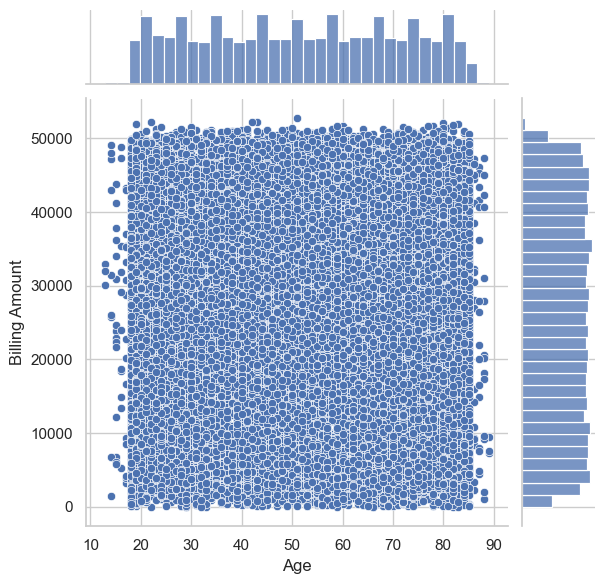

In [108]:
sns.jointplot(data=df, x="Age", y="Billing Amount", kind="scatter")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Billing Amount", fontsize=12)

In [109]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


Text(0.5, 1.0, 'Length of Stay by Blood Type')

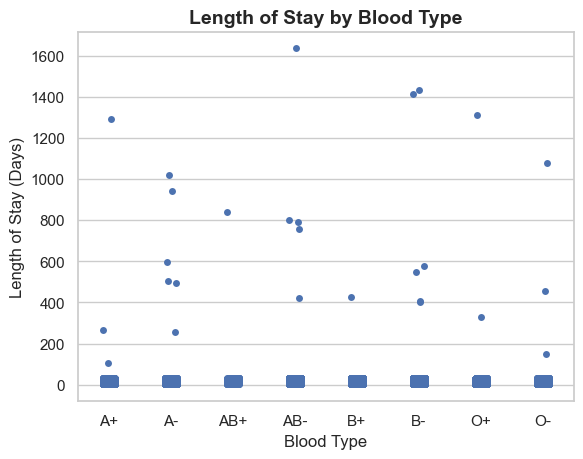

In [110]:
sns.stripplot(data=df, x="Blood Type", y="Length_of_Stay", jitter=True)
plt.xlabel("Blood Type", fontsize=12)
plt.ylabel("Length of Stay (Days)", fontsize=12)
plt.title("Length of Stay by Blood Type", fontsize=14, fontweight='bold')

## Mostly people's Length of stay around 1 week

C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\4223905978.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pie_data = df_year.groupby("Admission Type")["Billing Amount"].sum()


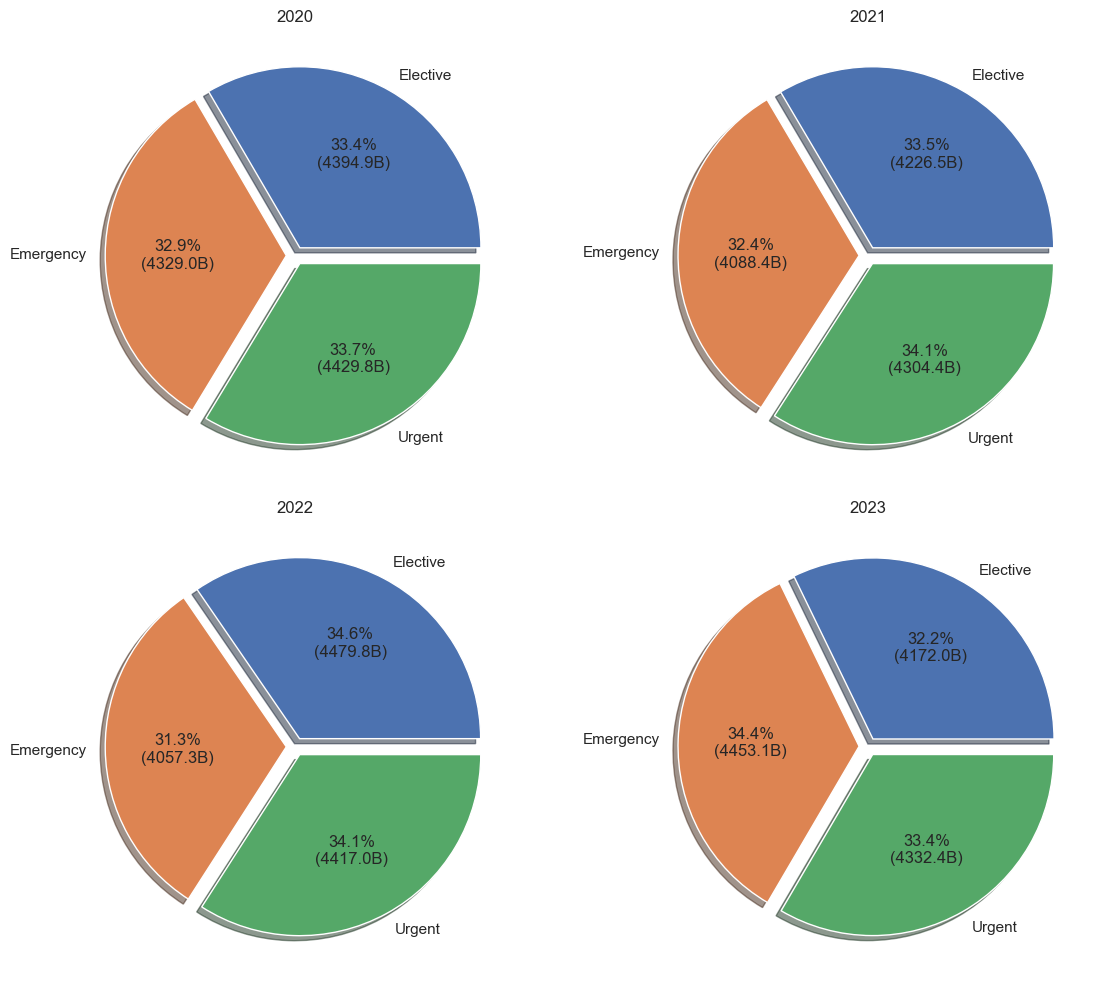

C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\4223905978.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Year")["Billing Amount"].sum().sort_values(ascending=False)


Year
2020    1.315369e+08
2023    1.295750e+08
2022    1.295416e+08
2021    1.261928e+08
2019    8.220989e+07
2024    4.962698e+07
Name: Billing Amount, dtype: float64

In [111]:
# Analyze the Billing amount partition by Admission Type per year

import matplotlib.pyplot as plt

years = [2020, 2021, 2022, 2023] 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()

for i, y in enumerate(years):
    df_year = df[df["Year"] == y]
    pie_data = df_year.groupby("Admission Type")["Billing Amount"].sum()
    
    axes[i].pie(pie_data.values, labels=pie_data.index,
                autopct=lambda p: f'{p:.1f}%\n({p*pie_data.sum()/1e6:.1f}B)',
                shadow=True, explode=[0.05]*len(pie_data))
    axes[i].set_title(y)

plt.tight_layout()
plt.show()


df.groupby("Year")["Billing Amount"].sum().sort_values(ascending=False)


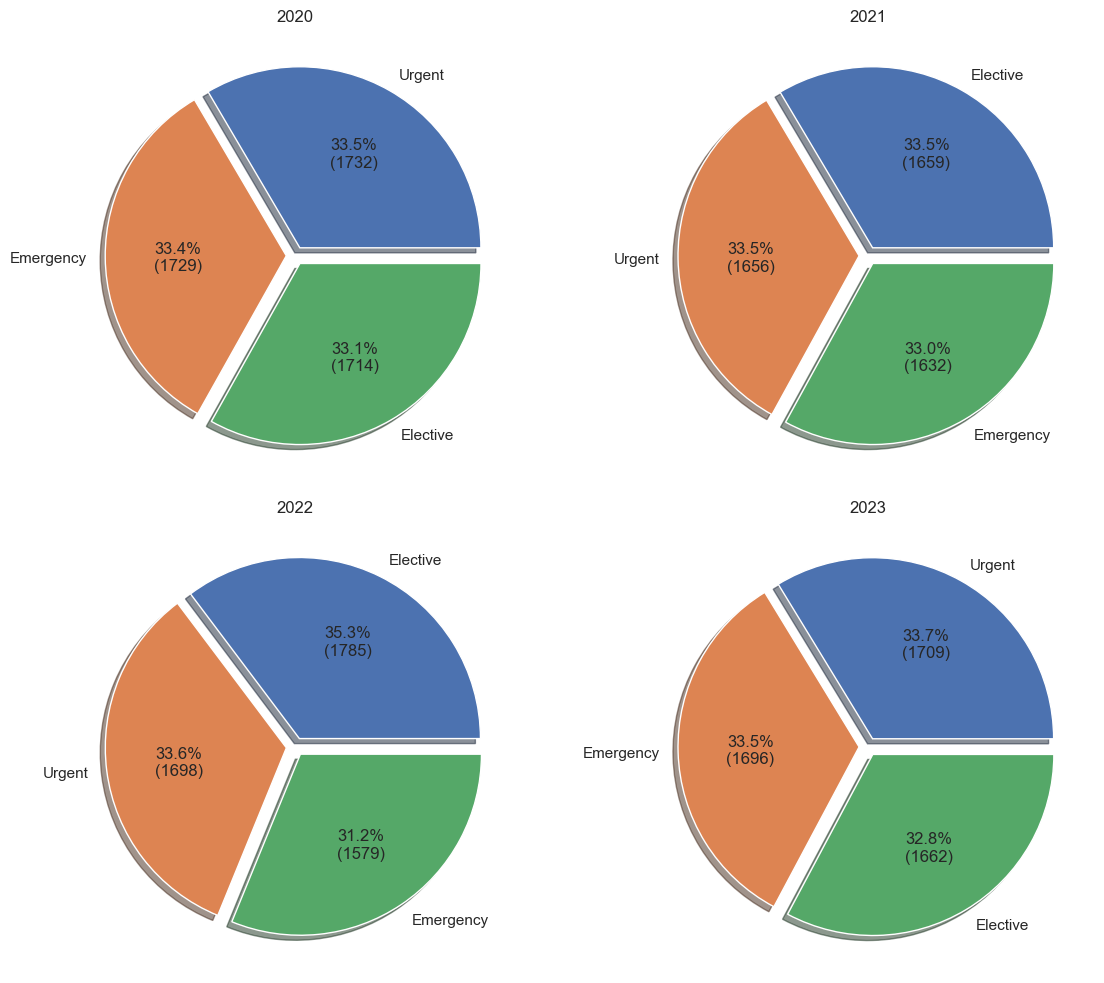

C:\Users\nikuj\AppData\Local\Temp\ipykernel_21988\230098903.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Year").agg(Counts=("Year","count")).sort_values(by="Counts", ascending=False)


,Counts
Year,
2020,5176
2023,5068
2022,5064
2021,4950
2019,3224
2024,1942


In [112]:
import matplotlib.pyplot as plt

years = [2020, 2021, 2022, 2023]  
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, y in enumerate(years):
    df_year = df[df["Year"] == y]
    pie_data = df_year["Admission Type"].value_counts()
    
    axes[i].pie(pie_data.values, labels=pie_data.index,
                autopct=lambda p: f'{p:.1f}%\n({int(p*pie_data.sum()/100)})',
                shadow=True, explode=[0.05]*len(pie_data))
    axes[i].set_title(y)

plt.tight_layout()
plt.show()

df.groupby("Year").agg(Counts=("Year","count")).sort_values(by="Counts", ascending=False)


### 2020 had the highest billing amount, and it also had the highest number of patients

In [113]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


Text(0.5, 1.0, 'Patient Count by Insurance Provider')

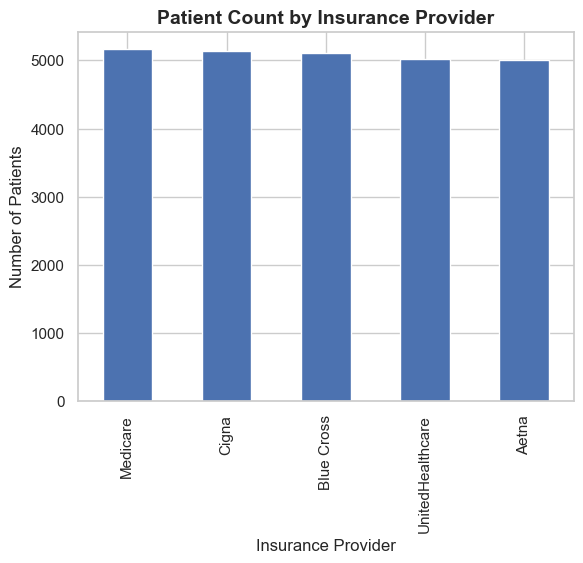

In [114]:
# Which insurance do patients prefer?
df["Insurance Provider"].value_counts().plot(kind = 'bar')
plt.xlabel("Insurance Provider", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Patient Count by Insurance Provider", fontsize=14, fontweight='bold')

### There is no such large difference btw them but Medicare have most patient counts

In [115]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
0,19,Female,A+,Arthritis,2020-08-14,Benjamin Banks,White-Graham,Medicare,10693.389264,435,Elective,2020-08-28,Ibuprofen,Abnormal,14,Young_Adult,Low,10-20,8,2020,2020-08-01
1,18,Male,A+,Obesity,2020-02-29,Samantha Mason,Garcia-Aguilar,Cigna,14632.605291,298,Emergency,2020-03-12,Paracetamol,Inconclusive,12,Child,Medium,10-20,3,2020,2020-03-01
2,30,Female,A+,Diabetes,2022-10-12,Gary Thomas,Tucker Ltd,Blue Cross,17758.515701,346,Emergency,2022-10-13,Penicillin,Abnormal,1,Young_Adult,Medium,20-30,10,2022,2022-10-01
3,67,Female,A+,Hypertension,2019-09-10,Steven Hester,"Gardner Morris Lee, and",Aetna,35215.506472,388,Urgent,2019-09-26,Lipitor,Inconclusive,16,Senior,High,60-70,9,2019,2019-09-01
4,46,Male,A+,Asthma,2020-03-19,Becky Alexander,"Harper Wagner Turner, and",Medicare,16019.196251,144,Urgent,2020-04-14,Aspirin,Normal,26,Adult,Medium,40-50,4,2020,2020-04-01


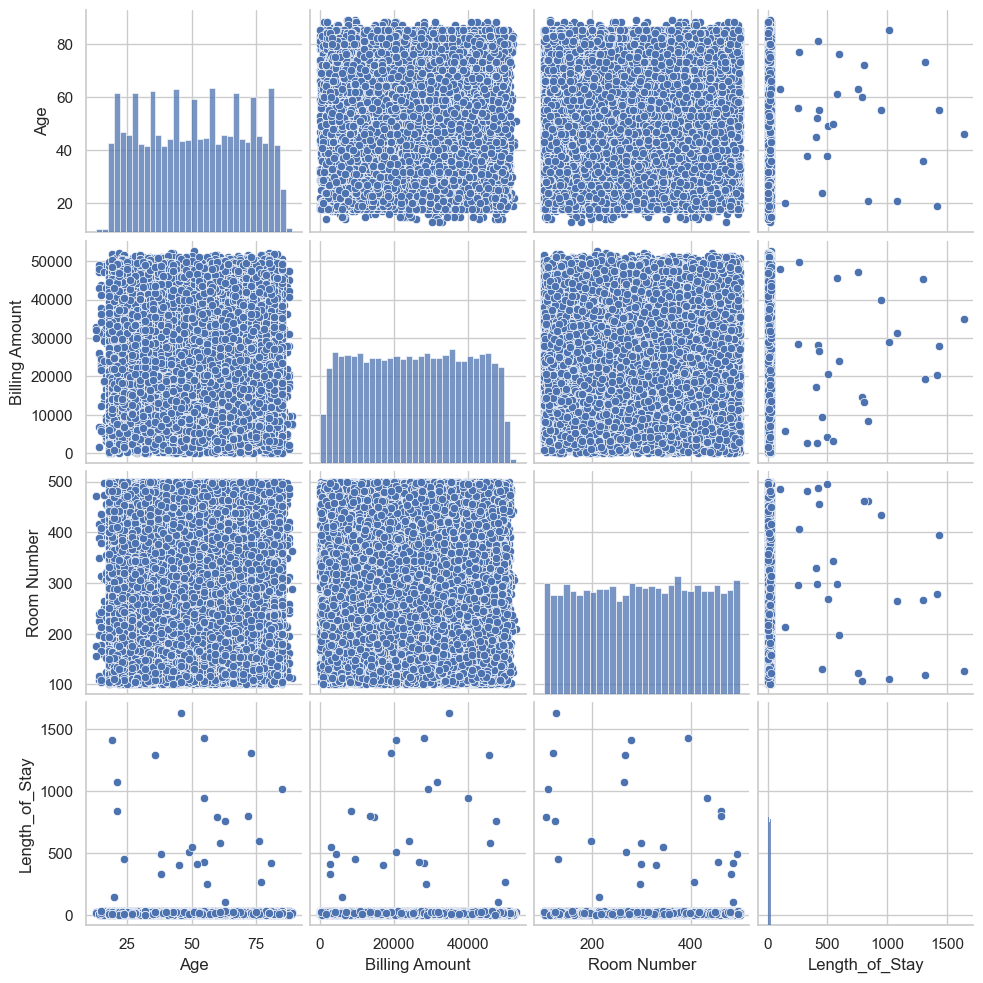

In [116]:
sns.pairplot(df)

In [117]:
# Pateint Counts by Billing category

df["Billing_Category"].value_counts()

Billing_Category
High         6411
Low          6373
Medium       6332
Very_High    6308
Name: count, dtype: int64

## The "Billing Category" labeled as High has the highest number of patients.

## 🔍 Data Quality Checks

In [118]:
print('Missing Values per Column:')
print(df.isnull().sum())

print('\nDuplicate Records:')
print(df.duplicated().sum())

Missing Values per Column:
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length_of_Stay        0
Age_Group             0
Billing_Category      0
Age Group             0
Months                0
Year                  0
Month Year            0
dtype: int64

Duplicate Records:
0


## 📊 Statistical Summary

In [119]:
df.describe(include='all')

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay,Age_Group,Billing_Category,Age Group,Months,Year,Month Year
count,25424.000000,25424,25424,25424,25424,25424,25424,25424,25424.000000,25424.000000,25424,25424,25424,25424,25424.000000,25424,25424,25424,25424.0,25424.0,25424
unique,NaN,2,8,6,NaN,21317,20646,5,NaN,NaN,3,NaN,5,3,NaN,5,4,8,12.0,6.0,NaN
top,NaN,Male,B-,Obesity,NaN,Michael Smith,Johnson PLC,Medicare,NaN,NaN,Elective,NaN,Aspirin,Abnormal,NaN,Senior,High,20-30,5.0,2020.0,NaN
freq,NaN,12774,5247,4287,NaN,13,26,5161,NaN,NaN,8612,NaN,5151,8513,NaN,7429,6411,3837,2251.0,5176.0,NaN
mean,51.413271,NaN,NaN,NaN,2021-10-29 04:09:12.800503552,NaN,NaN,NaN,25514.599017,301.818872,NaN,2021-11-14 08:46:31.189427456,NaN,NaN,16.192574,NaN,NaN,NaN,NaN,NaN,2021-10-30 13:06:56.865953536
min,13.000000,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,9.238787,101.000000,NaN,2019-05-10 00:00:00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2019-05-01 00:00:00
25%,34.000000,NaN,NaN,NaN,2020-07-21 00:00:00,NaN,NaN,NaN,13217.715517,203.000000,NaN,2020-08-07 00:00:00,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,2020-08-01 00:00:00
50%,51.000000,NaN,NaN,NaN,2021-10-27 00:00:00,NaN,NaN,NaN,25543.499141,303.000000,NaN,2021-11-13 00:00:00,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,2021-11-01 00:00:00
75%,68.000000,NaN,NaN,NaN,2023-01-31 00:00:00,NaN,NaN,NaN,37690.291497,401.000000,NaN,2023-02-16 00:00:00,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,2023-02-01 00:00:00
max,89.000000,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,52764.276736,500.000000,NaN,2024-06-06 00:00:00,NaN,NaN,1636.000000,NaN,NaN,NaN,NaN,NaN,2024-06-01 00:00:00


## 🧩 Feature Engineering – Length of Stay

In [120]:
df['Stay_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
print('Average Stay Duration (Days):', df['Stay_Days'].mean())

Average Stay Duration (Days): 16.19257394587791


## 📈 Exploratory Data Analysis (Visualizations)

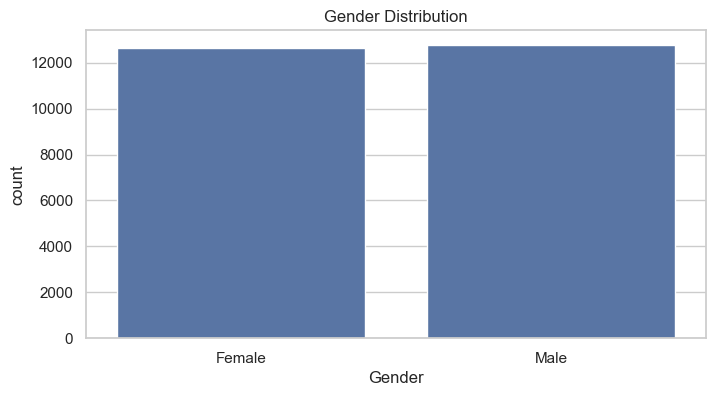

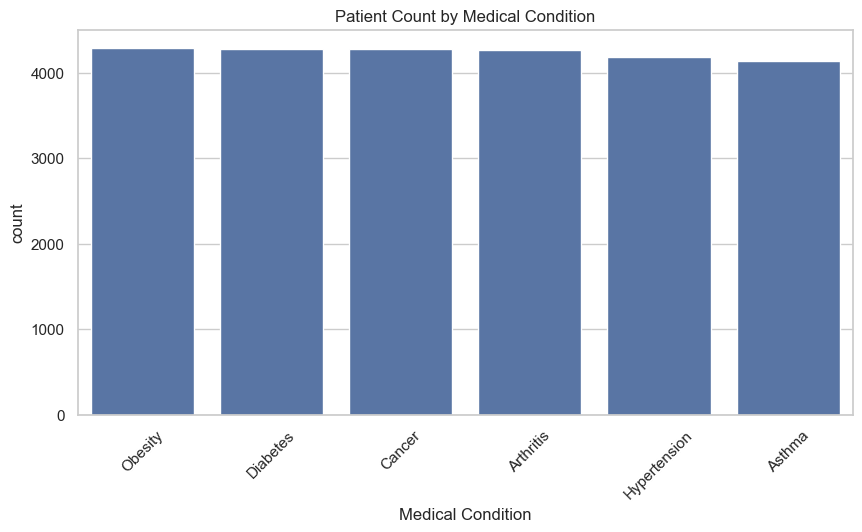

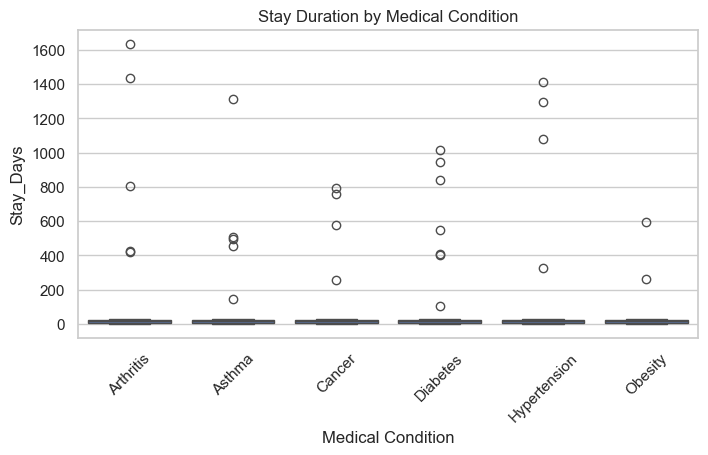

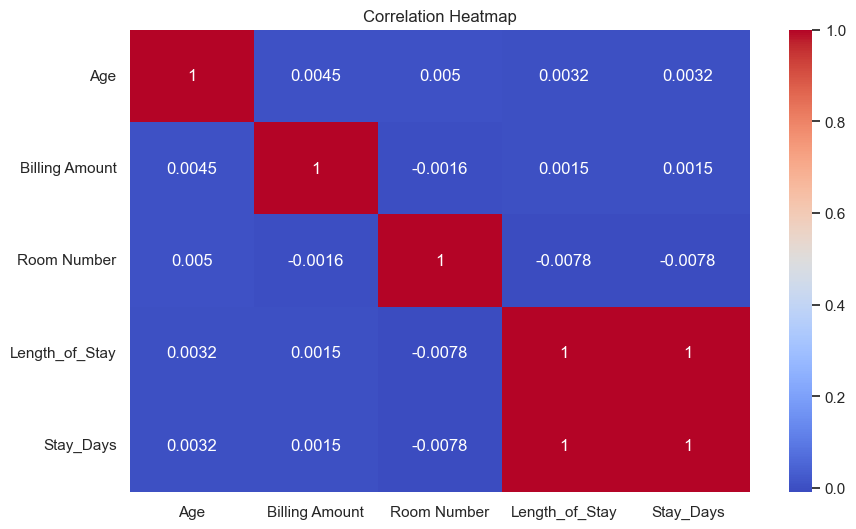

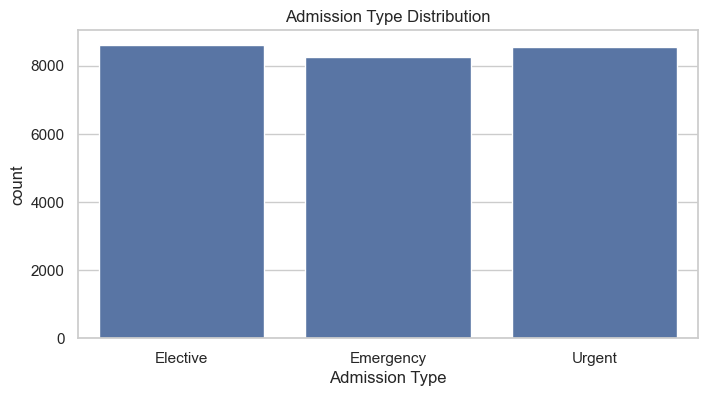

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Patient Count by Medical Condition')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Medical Condition', y='Stay_Days', data=df)
plt.xticks(rotation=45)
plt.title('Stay Duration by Medical Condition')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Type Distribution')
plt.show()

## 💾 Export Cleaned Data

In [122]:
df.to_csv('Cleaned_Medical_Data.csv', index=False)
print('Cleaned dataset saved successfully.')

Cleaned dataset saved successfully.


## 🧠 Key Insights
- Most admissions are for the top medical conditions shown in the chart above.
- Average patient stay duration is derived from `Stay_Days`.
- Visualizations show correlations between numerical features.
- Cleaned dataset is ready for Power BI dashboard creation.